# Case Study

Our client, a prominent real estate tycoon, has engaged us to develop a predictive model for estimating real estate sales prices. The goal is to leverage data-driven insights to enhance decision-making and optimize property valuations.



In [1]:
# Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [11]:
# Concatenate the sets to perform data manipulation and EDA
# Set ID as index for the right output.

df_all = pd.concat([df_train,df_test ], axis = 0)
df_all = df_all.set_index('Id')
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Understanding the Data in the train CSV

In [12]:
missing_values = df_all.isnull().sum().sort_values(ascending=False)
missing_values


PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
                 ... 
EnclosedPorch       0
MoSold              0
MiscVal             0
YrSold              0
SaleCondition       0
Length: 80, dtype: int64

In [14]:
missing_values_percentage = (missing_values / len(df_all)) * 100
missing_values_percentage.head(10)

PoolQC         99.657417
MiscFeature    96.402878
Alley          93.216855
Fence          80.438506
MasVnrType     60.500171
SalePrice      49.982871
FireplaceQu    48.646797
LotFrontage    16.649538
GarageYrBlt     5.447071
GarageCond      5.447071
dtype: float64

Interpretation of Statistics

High Missing Percentage (Over 50%)
1.  These features have significant gaps and may not add much predictive value to the model.
2. If a feature has more than 80% missing values and does not hold critical importance, dropping it may improve model performance by reducing noise.

1. PoolQC           99.657417
2. MiscFeature      96.402878
3. Alley            93.216855
4. Fence            80.438506

Moderate Missing Percentage (10% to 50%)
1. These features might contain useful information but have a fair number of gaps.

1. FireplaceQu    48.646797
2. LotFrontage    16.649538
3. GarageYrBlt     5.447071
4. GarageCond      5.447071

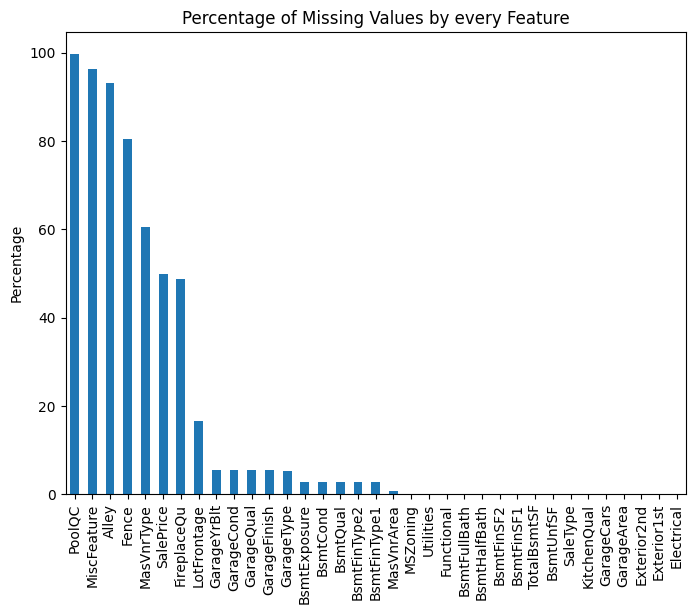

In [15]:
# Visualize the missing values
plt.figure(figsize=(8, 6))
missing_values_percentage[missing_values_percentage > 0].plot(kind='bar')
plt.title('Percentage of Missing Values by every Feature')
plt.ylabel('Percentage')
plt.show()

Drop all values where the percentage is more than 60%

In [17]:
# the threshold is 60 percent
threshold = 60

# the missing percent
missing_percentage = (df_all.isnull().sum() / len(df_all)) * 100

# Select the columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index

#drop the columns from the combined dataset
df_all.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {list(columns_to_drop)}")

Dropped columns: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [18]:
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


Identify the remaining columns with the missing values

In [19]:
remaining_missing = df_all.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
print(remaining_missing)

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64


For numerical columns I can fill the the missing values with the mean or median

For this project I want to use the median which is less affected by the outliers

In [21]:
# Find numerical columns
numerical_cols = df_all.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [23]:
# Use the median to fill the missing values
for col in numerical_cols:
    if df_all[col].isnull().sum() > 0:
        df_all[col] = df_all[col].fillna(df_all[col].median())

For categorical features I will use the most frequent string of each column

In [25]:
categorical_cols = df_all.select_dtypes(include=['object']).columns
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
for col in categorical_cols:
    if df_all[col].isnull().sum() > 0:
        df_all[col].fillna(df_all[col].mode()[0])

Perform a check to see if there are still missing values

In [30]:
remaining_missing = df_all.isnull().sum()
# Perform this check to get only the columns that Have missing values
remaining_missing = remaining_missing[remaining_missing > 0]
print(remaining_missing)

Series([], dtype: int64)


Step 2: After handling the missing values Hot encode the Categorical Colums

In [31]:
# Identify the Categorical Columns
categorical_cols = df_all.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


Encoding Strategy I will follow:
1. Label Encoding (For Ordinal or Binary Categories) (when there is an order)
2. One-Hot Encoding (For Nominal Categories) (features without an order)

Why it matters to have different Encoding Strategies
1. Label Encoding for nominal features can lead to the model misinterpreting the data as ordinal, which can harm model performance.
2. One-Hot Encoding prevents ordinal misinterpretation but increases the number of features, which might be computationally expensive.
3. Binary features are straightforward and often don't require complex encoding.

Ordinal -> Clear, intristic order or they have a ranking 

EX: Excellent > Good > Average > Fair > Poor

With label encoding the result will be:

Excellent -> 4
Good      -> 3
Average   -> 2
Fair      -> 1
Poor      -> 0

Nominal have no inherent order or ranking, They represent distinct groups, and no category is "greater" or "lesser" than another.

Example: OldTown, BrkSide, StoneBridge, MeadowV

One-Hot Encoding creates binary columns for each category:

OldTown      -> 1 0 0 0
BrkSide      -> 0 1 0 0
StoneBridge  -> 0 0 1 0
MeadowV      -> 0 0 0 1



In [32]:
from sklearn.preprocessing import LabelEncoder

Encoding Ordinal Columns

In [33]:
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

In [34]:
encoder = LabelEncoder()

In [35]:
for col in ordinal_cols:
    df_all[col] = encoder.fit_transform(df_all[col])

In [37]:
df_all[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
Id,,,,,,,,
1,2,4,2,3,0,2,4,4
2,3,4,2,3,0,3,4,4
3,2,4,2,3,0,2,4,4
4,3,4,3,1,2,2,4,4
5,2,4,2,3,0,2,4,4


Encoding Nominal Columns

In [38]:
nominal_cols = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle']

df_all = pd.get_dummies(df_all, columns=nominal_cols, drop_first=True)

In [40]:
df_all

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,False,False,True,False,False,True,False,False,False,False
2,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,...,False,False,False,False,False,True,False,False,False,False
3,60,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,False,False,True,False,False,True,False,False,False,False
4,70,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,...,False,False,True,False,False,True,False,False,False,False
5,60,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,False,False,True,False,False,True,False,False,False,False
2916,160,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,False,False,True,False,False,True,False,False,False,False
2917,20,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,False,False,False,False,False,True,False,False,False,False


Feature Engineering: Create new features or derive insights from existing ones

My strategy here is to create new features and get better analytics results
1. Total Square Footage = How big is an the house and the total living space (Combine basement, first-floor, and second-floor areas)
2. Age of the House = How old is the house at the time of sale (YearSold - YearBuild)
3. Years Since Remodel = Check if the house was remodeled recently (YearSold - YearRemodAdd)
4. FullBathroom = Here we have FullBath and Half Bath and I want to combine both for a more comprehensive view  ()


In [41]:
# Total Square Footage
df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

In [42]:
df_all['TotalSF']

Id
1       2566.0
2       2524.0
3       2706.0
4       2473.0
5       3343.0
         ...  
2915    1638.0
2916    1638.0
2917    2448.0
2918    1882.0
2919    2996.0
Name: TotalSF, Length: 2919, dtype: float64

In [43]:
# Age of the house
df_all['HouseAge'] = df_all['YrSold'] - df_all['YearBuilt']
df_all['HouseAge']

Id
1        5
2       31
3        7
4       91
5        8
        ..
2915    36
2916    36
2917    46
2918    14
2919    13
Name: HouseAge, Length: 2919, dtype: int64

In [44]:
# YearsSinceRemodel
df_all['YearsSinceRemodel'] = df_all['YrSold'] - df_all['YearRemodAdd']
df_all['YearsSinceRemodel']

Id
1        5
2       31
3        6
4       36
5        8
        ..
2915    36
2916    36
2917    10
2918    14
2919    12
Name: YearsSinceRemodel, Length: 2919, dtype: int64

In [45]:
# Full Bath Feature
df_all['TotalBath'] = df_all['FullBath'] + (df_all['HalfBath'] * 0.5) + df_all['BsmtFullBath'] + (df_all['BsmtHalfBath'] * 0.5)
df_all['TotalBath']


Id
1       3.5
2       2.5
3       3.5
4       2.0
5       3.5
       ... 
2915    1.5
2916    1.5
2917    2.0
2918    1.5
2919    2.5
Name: TotalBath, Length: 2919, dtype: float64

Workflow for Building the Model I will use Linear Model:
1. Linear Regression – Basic model, good for simple relationships.
2. Ridge Regression – Linear regression with L2 regularization (reduces overfitting).
3. Lasso Regression – Linear regression with L1 regularization (performs feature selection by shrinking some coefficients to zero).
4. ElasticNet – Combination of L1 and L2 regularization.

Before the model building I will use the correlation matrix to decide which features are the most important from numerical that have the higest correlation with my SalePrice. This will help me find the best indicators for the linear models

Correlation Matrix

In [54]:
# Keep only the numerical columns
correlation_matrix = df_all.corr(numeric_only=True)

# Get correlation with SalePrice and sort
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Select features with correlation above 0.3 (threshold)
top_features = correlation_with_target[correlation_with_target > 0.3].index

# Display top features
print("Top Correlated Features:\n", top_features)

Top Correlated Features:
 Index(['SalePrice', 'TotalSF', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', 'TotalBath', '1stFlrSF', 'TotRmsAbvGrd',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'GarageYrBlt'],
      dtype='object')


Since I will be building an app I want the user to input the values for the key features and my algorithm to predict the sales price. So will only use the best 10 features for the price prediction because the features above are 15 and if I use over 50% which is a good high correlation there are only 5-7.

In [56]:
top_10_features = correlation_with_target[1:11].index  # Skip index 0 (SalePrice)
print("Top 10 Correlated Features are: ", top_10_features)


Top 10 Correlated Features are:  Index(['TotalSF', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'TotalBath', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath'],
      dtype='object')


Step 3: Build The model and prepare the data for the model building

In [57]:
# The new dataframe with the selected top 10 features + Sales price
df_model = df_all[top_10_features.union(['SalePrice'])]
df_model

,1stFlrSF,FullBath,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice,TotRmsAbvGrd,TotalBath,TotalBsmtSF,TotalSF
Id,,,,,,,,,,,
1,856,2,548.0,2.0,1710,7,208500.0,8,3.5,856.0,2566.0
2,1262,2,460.0,2.0,1262,6,181500.0,6,2.5,1262.0,2524.0
3,920,2,608.0,2.0,1786,7,223500.0,6,3.5,920.0,2706.0
4,961,1,642.0,3.0,1717,7,140000.0,7,2.0,756.0,2473.0
5,1145,2,836.0,3.0,2198,8,250000.0,9,3.5,1145.0,3343.0
...,...,...,...,...,...,...,...,...,...,...,...
2915,546,1,0.0,0.0,1092,4,163000.0,5,1.5,546.0,1638.0
2916,546,1,286.0,1.0,1092,4,163000.0,6,1.5,546.0,1638.0
2917,1224,1,576.0,2.0,1224,5,163000.0,7,2.0,1224.0,2448.0


In [58]:
df_model.shape

(2919, 11)

Test and train split

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
# Separate features and target
X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

In [62]:
X

,1stFlrSF,FullBath,GarageArea,GarageCars,GrLivArea,OverallQual,TotRmsAbvGrd,TotalBath,TotalBsmtSF,TotalSF
Id,,,,,,,,,,
1,856,2,548.0,2.0,1710,7,8,3.5,856.0,2566.0
2,1262,2,460.0,2.0,1262,6,6,2.5,1262.0,2524.0
3,920,2,608.0,2.0,1786,7,6,3.5,920.0,2706.0
4,961,1,642.0,3.0,1717,7,7,2.0,756.0,2473.0
5,1145,2,836.0,3.0,2198,8,9,3.5,1145.0,3343.0
...,...,...,...,...,...,...,...,...,...,...
2915,546,1,0.0,0.0,1092,4,5,1.5,546.0,1638.0
2916,546,1,286.0,1.0,1092,4,6,1.5,546.0,1638.0
2917,1224,1,576.0,2.0,1224,5,7,2.0,1224.0,2448.0


In [63]:
y

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
2915    163000.0
2916    163000.0
2917    163000.0
2918    163000.0
2919    163000.0
Name: SalePrice, Length: 2919, dtype: float64

For my Train and test split I will 80 percent training and 20 percent test (Like the pareto principle)

In [64]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3.1: Before building the algorithm and training we have to apply Scaling to all the features it is necessary for linear models

Linear models are sensitive to the scale of features. Features with larger ranges dominate the prediction, leading to biased results.

Scaling ensures that all features contribute equally to the model.


In [65]:
from sklearn.preprocessing import StandardScaler


In [66]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 3.2 Here I will input all my models with some optimizations and I will check their respective performance

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error

Parameters For Models alpha and l1_ratio

Alpha -> is the regularization strength in Ridge, Lasso, and ElasticNet models. It controls the penalty applied to the model coefficients to prevent overfitting.

Higher alpha → Stronger regularization → Shrinks coefficients more → Simpler model (less complex).

Lower alpha → Weaker regularization → Allows more flexibility but may lead to overfitting.

alpha = 0 → No regularization → Model behaves like standard Linear Regression.

Overfitting occurs when a machine learning model learns the training data too well, capturing noise and random fluctuations rather than the actual underlying pattern.

In linear models, large coefficients can cause overfitting (the model fits the training data too closely and performs poorly on unseen data).

Regularization reduces the magnitude of coefficients, making the model more generalizable.

l1_ratio controls the balance between L1 and L2 penalties:
1. l1_ratio = 1 → Pure Lasso (100% L1 penalty).
2. l1_ratio = 0 → Pure Ridge (100% L2 penalty).
3. l1_ratio = 0.5 → Equal mix of L1 and L2 penalties.

How to choose the best l1_ratio:
1. If many features are irrelevant, use a higher l1_ratio (closer to Lasso).
2. If features are highly correlated, lower the l1_ratio (closer to Ridge).


In [69]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5)
}

Train and evaluate each model

In [70]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae
    print(f"{name} - Mean Absolute Error: {mae:.2f}")

LinearRegression - Mean Absolute Error: 31558.81
Ridge - Mean Absolute Error: 31558.66
Lasso - Mean Absolute Error: 31559.08
ElasticNet - Mean Absolute Error: 31554.81


c:\Users\user\Desktop\ProjectImprovement\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.257e+12, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(


Intepreting the Results
1. MAE measures the average difference between the predicted values and the actual values.
2. It gives you an idea of how far, on average, the predictions are from the actual house prices.

Lower MAE = Better Model

This means LinearRegression's predictions are, on average, $31558.81 away from the actual house price, while ElasticNet predictions are $31554.81 away.



Compare the models and check the best results

In [71]:

best_model = min(results, key=results.get)
print(f"\nBest Model: {best_model} with MAE = {results[best_model]:.2f}")


Best Model: ElasticNet with MAE = 31554.81


Still the difference of more than 10000$ it is considerably bad and I want to improve the model in the further with gridsearch. 

But first I will visualize to see how close the preidictions are to the real price

In [72]:
# First for each algorithm I have to generate the predictions
predictions = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

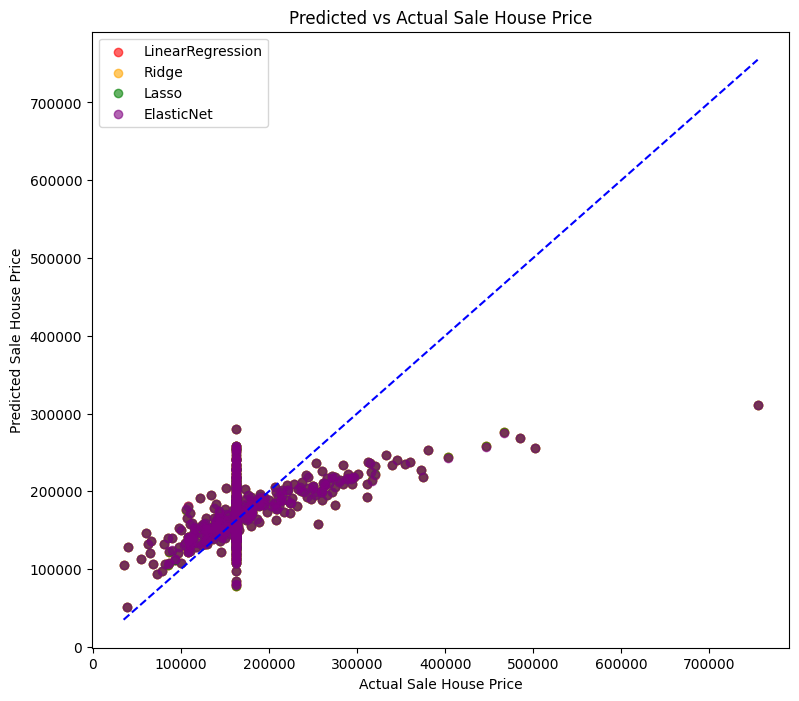

In [75]:
# plot the results
plt.figure(figsize=(9, 8))

# For each algo I want a different color
colors = ['red', 'orange', 'green', 'purple']  # Assign unique colors
for i, (name, y_pred) in enumerate(predictions.items()):
    plt.scatter(y_test, y_pred, alpha=0.6, color=colors[i], label=f'{name}')
    
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='blue')  
plt.xlabel('Actual Sale House Price')
plt.ylabel('Predicted Sale House Price')
plt.title('Predicted vs Actual Sale House Price')
plt.legend()
plt.show()

The predictions are in similar places so I will use other methods for visualizations

Residual Plot (Prediction Errors Visualization)

The residual plot shows the difference between predicted and actual values. Ideally, residuals should be randomly distributed around zero.

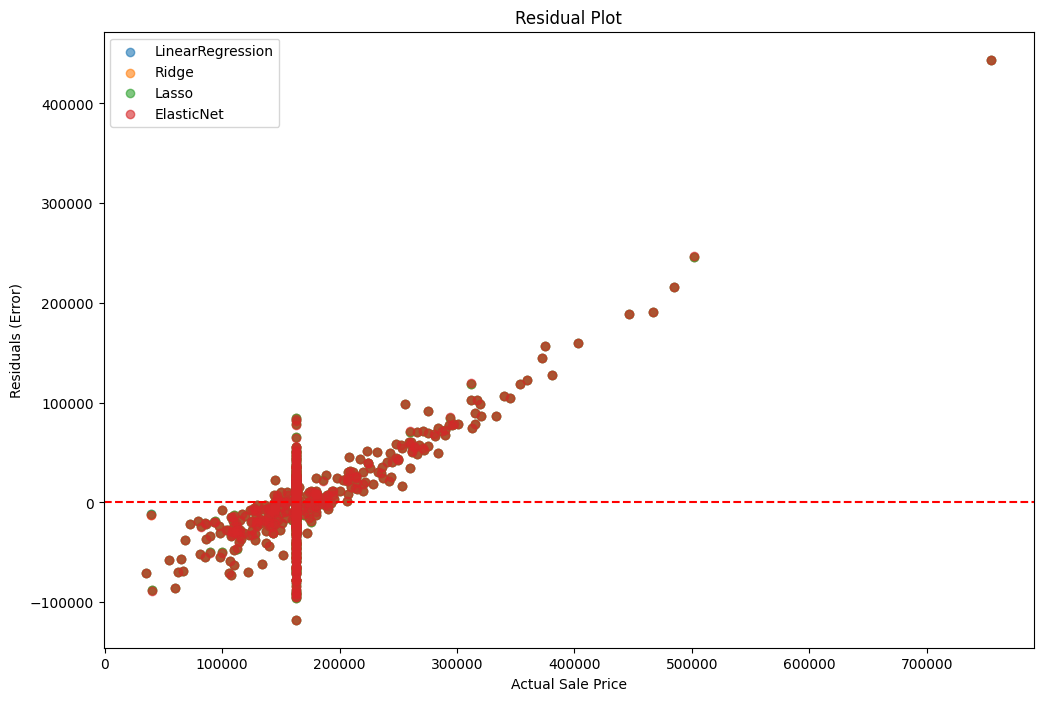

In [76]:
plt.figure(figsize=(12, 8))
for name, y_pred in predictions.items():
    residuals = y_test - y_pred
    plt.scatter(y_test, residuals, alpha=0.6, label=f'{name}')

plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Actual Sale Price')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot')
plt.legend()
plt.show()

Step 3.3: Implement the grid research to improve the model performance

In [78]:
from sklearn.model_selection import GridSearchCV

Define the hyperparameters

In [79]:
elastic_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1]  # Balance between L1 penalty and L2 penalty
}

Perform Grid Research

In [84]:
elastic_model = ElasticNet(max_iter=1000)

# Grid search with 3-fold cross-validation
elastic_grid = GridSearchCV(
    elastic_model,
    elastic_params,
    cv=5,
    scoring='neg_mean_absolute_error'
)

elastic_grid.fit(X_train_scaled, y_train)


c:\Users\user\Desktop\ProjectImprovement\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.776e+09, tolerance: 5.944e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\Desktop\ProjectImprovement\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.424e+11, tolerance: 5.944e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\Desktop\ProjectImprovement\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1]},
             scoring='neg_mean_absolute_error')

Find the best model parameters

In [85]:
# Get the best hyperparameters
best_alpha = elastic_grid.best_params_['alpha']
best_l1_ratio = elastic_grid.best_params_['l1_ratio']

print(f"Best ElasticNet Hyperparameters are: alpha = {best_alpha} and l1_ratio = {best_l1_ratio}")

# Evaluate on the test set
y_pred = elastic_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)

print(f"ElasticNet - Mean Absolute Error on Test Set: {mae:.2f}")

Best ElasticNet Hyperparameters are: alpha = 10 and l1_ratio = 0.1
ElasticNet - Mean Absolute Error on Test Set: 31282.55


Still the value is bigger than 30000 thousand but I will keep my model

I will save the model

In [86]:
import joblib

joblib.dump(elastic_grid.best_estimator_, 'elasticnet_best_model.pkl')

print("Model saved as 'elasticnet_best_model.pkl'")

Model saved as 'elasticnet_best_model.pkl'
